[출처](https://www.datamanim.com/dataset/ADPpb/00/22.html)  
[참고](https://ysjang0926.github.io/data/2021/09/22/ADP-22-comments/)

# 머신러닝
## 1. 데이터 확인 및 전처리

**데이터 설명**

- 신체스펙

    - Pregnancies

    - Glucose

    - BloodPressure

    - SkinThickness

    - Insulin

    - BMI

    - DiabetesPedigreeFunction

    - Age

- 발병유무(종속변수) : Outcome

### 1.1 탐색적 데이터 분석 수행(시각화 포함)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
# 결측치 개수
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# 중복행 개수
df.duplicated().sum()

0

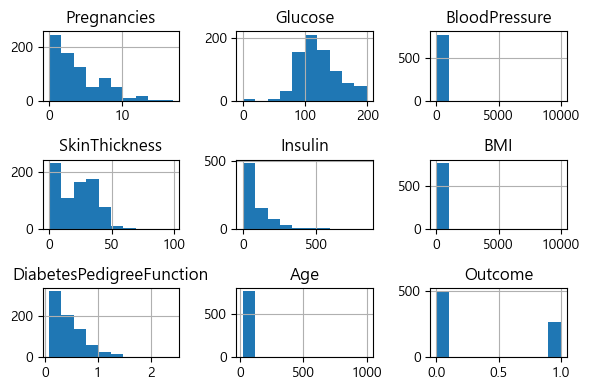

In [26]:
# 변수 분포 시각화
df.hist(figsize=(6,4))
plt.tight_layout()
plt.show()

In [27]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

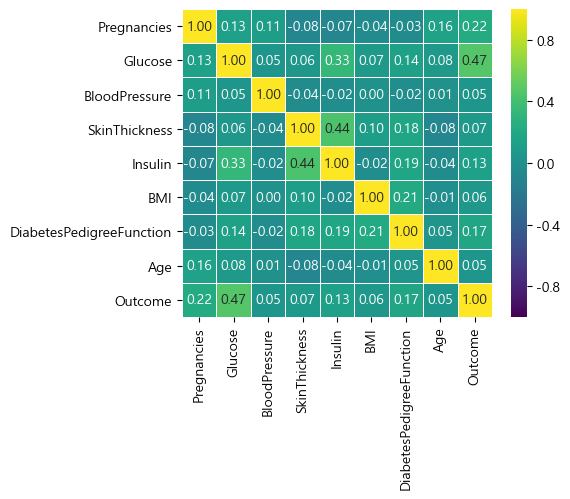

In [15]:
df_corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(df_corr, cmap='viridis', annot=True, linewidth=0.4, vmax=1, vmin=-1, fmt='.2f')
plt.show()

[해석]
1. 결측치 존재 여부
    - 모든 컬럼에서 결측치가 존재하지 않는다.
1. 데이터 타입
    - 종속변수는 int형, 나머지 독립변수는 int형, float형으로 구성되어 있다.
1. 종속변수와 독립변수의 상관관계
    - 종속변수 Outcome와의 상관계수를 확인해 보았을 때, 큰 상관성이 없었다.
1. 독립변수 간 상관관계
    - 다중공선성을 의심할만큼 독립변수들끼리의 상관성이 큰 변수는 보이지 않았다.
1. 종속변수 분포
    - Outcome 컬럼은 0 또는 1로 이루어진 이진 변수로 분포를 확인한 결과, 0 값이 500개, 1 값이 268개로 데이터 불균형이 의심된다.
    - 따라서 오버 샘플링 또는 언더 샘플링 기법을 이용해서 데이터 불균형 문제를 해결해야 할 것이다.

### 1.2 이상치 처리(이상값 대체방안 제시)
- 이상치 확인을 위해 독립변수들의 상자그림을 시각화한 결과, BloodPressure, BMI, Age 세 변수에서 이상치를 확인하였다.
    - 각각 9999, 9999.0, 999 값으로 확인하였다.
- Insulin 변수도 이상치가 존재하였지만, 위 세 가지 변수처럼 동떨어진 값이 아닌 연속적으로 발생한 값들이기에 이상치가 아니라고 판단하였다.
- 연속형 변수의 이상치 처리 방법은 평균, 중앙값 등의 값으로 대체하는 방식이 있는데, 본 분석에서는 평균으로 대체하였다.

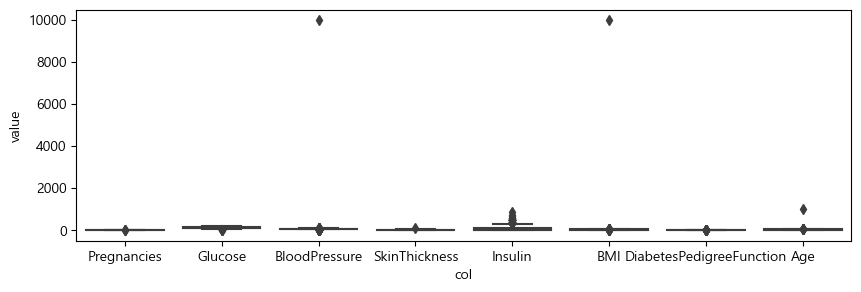

In [28]:
# 독립변수 상자그림
melt_df = pd.melt(df.drop('Outcome', axis=1), var_name='col', value_name='value')
plt.figure(figsize=(10, 3))
sns.boxplot(x='col', y='value', data=melt_df)
plt.show()

In [32]:
df.sort_values('BloodPressure', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
691,13,158,9999,0,0,42.3,0.257,44,1
106,1,96,122,0,0,22.4,0.207,27,0
43,9,171,110,24,240,45.4,0.721,54,1


In [33]:
df.sort_values('BMI', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,9999.0,2.420,25,1
177,0,129,110,46,130,67.1,0.319,26,1
673,3,123,100,35,240,57.3,0.880,22,0


In [38]:
df.sort_values('Age', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119,0,0,0,19.6,0.832,999,0
459,9,134,74,33,60,25.9,0.460,81,0
666,4,145,82,18,0,32.5,0.235,70,1


In [6]:
# 평균으로 이상치 대체
df.loc[df['BloodPressure']>=9999, 'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BMI']>=9999, 'BMI'] = np.mean(df['BMI'])
df.loc[df['Age']>=999, 'Age'] = np.mean(df['Age'])

### 1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성
1. 종속변수에서 데이터 불균형 문제가 우려되므로 오버 샘플링이나 언더 샘플링을 통해 문제를 해결할 필요가 있을 것이다.
1. 각 컬럼별로 값의 범위가 상이하기 때문에 스케일링 작업을 통해 모든 컬럼의 값의 범위를 같게 만들어야 할 것이다.
1. 종속변수가 이진 변수이므로 회귀모델이 아닌 분류 모델을 사용해야 할 것이다.

## 2 1번 문제 데이터 참고하여
### 2.1 오버샘플링 과정 설명하고 결과 작성
- 오버샘플링은 소수의 레이블을 지닌 데이터 세트를 다수 레이블을 지닌 데이터 세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용된다.
- 랜덤 오버 샘플링
    - 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
    - 데이터를 단순 복사하는 방식이므로 기본의 데이터와 동일한 복제 데이터를 생성한다.
    - 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용 방법이 간단하다는 장점이 있다.
- SMOTE
    - 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
    - 랜덤 샘플링 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있다.

In [19]:
# 오버 샘플링
from imblearn.over_sampling import SMOTE

X = df.drop('Outcome', axis=1)
y = df.Outcome

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
print('기존 타깃 분포')
print(df['Outcome'].value_counts())
print('-'*10)
print('SMOTE 타깃 분포')
print(pd.Series(y_sm).value_counts())

기존 타깃 분포
0    500
1    268
Name: Outcome, dtype: int64
----------
SMOTE 타깃 분포
1    500
0    500
dtype: int64


### 2.2 언더샘플링 과정 설명하고 결과 작성
- 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식으로 대표적으로 random으로 다수의 클래스의 데이터를 선택하여 삭제하는 RandomUnderSampler, 서로 다른 클래스가 있을 때 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수 클래스의 데이터를 제거하는 Tomek link 방식이 있다.

In [20]:
# 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
print('기존 타깃 분포')
print(df['Outcome'].value_counts())
print('-'*10)
print('RandomUnderSampler 타깃 분포')
print(pd.Series(y_rus).value_counts())

기존 타깃 분포
0    500
1    268
Name: Outcome, dtype: int64
----------
RandomUnderSampler 타깃 분포
1    268
0    268
dtype: int64


### 2.3 둘 중 하나를 선택하고 이유 설명
- 본 분석은 오버 샘플링 방식(SMOTE)을 이용할 것이다.
- 언더 샘플링은 데이터 소실로 인해 오버핑팅이 일어날 위험이 있기 때문이다.

## 3 2번 문제 데이터 참고하여

### 3.1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)
속도 측면에서 로지스틱 회귀모델, 정확도 측면에서 서포트 벡터 머신, 기타로 xgboost 모델을 선정하였다.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

# 모델 지정
log = LogisticRegression(solver='liblinear')
xgb = XGBClassifier()
svc = SVC()

# 데이터 분할
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123, stratify=y_sm)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [50]:
start = time.time()
log.fit(X_train, y_train)
end = time.time()
log_pred = log.predict(X_test)
print('<로지스틱 회귀모델>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, log_pred), 4))

소요시간:  0.00997186 sec
모델 정확도: 0.7667


In [51]:
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
xgb_pred = xgb.predict(X_test)
print('<XGBoost>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, xgb_pred), 4))

[21:03:07] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
소요시간:  0.24342799 sec
모델 정확도: 0.8067


In [52]:
start = time.time()
svc.fit(X_train, y_train)
end = time.time()
svc_pred = svc.predict(X_test)
print('<SCV>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, svc_pred), 4))

소요시간:  0.02697349 sec
모델 정확도: 0.7067


### 3.2 모델 비교하고 결과 설명
- 세 가지 모델의 성능을 정확도 기준으로 비교한 결과, 정확도가 가장 높은 모델은 XGBoost이었고, 속도 측면에서는 로지스틱 회귀모델이 가장 빠른 것으로 나타났다.

### 3.3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

# 주성분 분석
pca = PCA(n_components=8)
pca_fit = pca.fit(X_train_sc)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())
# plt.figure(figsize=(6,4))
# plt.plot(pca.explained_variance_ratio_, 'o-');

[0.25603962 0.22261443 0.13031951 0.11820133 0.09548193 0.07964007
 0.05218437 0.04551875]
0.8226568106500489


[해석]
- 해당 데이터에서 독립변수를 차원 축소시켜 적절한 주성분의 개수를 찾아보고자 하였다. 8개의 독립변수 대신에 5개 주성분까지 사용하면 전체 데이터의 82%를 설명할 수 있음을 파악하였다.

In [68]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123, stratify=y_sm)

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 주성분 분석
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.fit_transform(X_test_sc)

In [75]:
start = time.time()
log.fit(X_train_pca, y_train)
end = time.time()
log_pred = log.predict(X_test_pca)
print('<로지스틱 회귀모델>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, log_pred), 4))

<로지스틱 회귀모델>
소요시간:  0.00199556 sec
모델 정확도: 0.4433


In [81]:
start = time.time()
xgb.fit(X_train_pca, y_train)
end = time.time()
xgb_pred = xgb.predict(X_test_pca)
print('<XGBoost>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, xgb_pred), 4))

[21:57:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<XGBoost>
소요시간:  0.2663157 sec
모델 정확도: 0.4367


In [77]:
start = time.time()
svc.fit(X_train_pca, y_train)
end = time.time()
svc_pred = svc.predict(X_test_pca)
print('<SCV>')
print('소요시간: ', round(end-start, 8), 'sec')
print('모델 정확도:', round(accuracy_score(y_test, svc_pred), 4))

<SCV>
소요시간:  0.02493858 sec
모델 정확도: 0.4467


[해석]
- 예측 성능은 다소 떨어졌지만 속도는 차원 축소로 인해 더 빨라졌다. 향후에 데이터가 크게 늘어난다면 차원 축소를 통해 성능 및 속도 측면에서 더 유의미한 결과를 찾아낼 수 있을 것이다.

# 통계분석
## 4. 금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

### 4.1 연구가설과 귀무가설 작성
- 귀무가설: 금속 재질 함유량의 분산이 1.3이다.
- 대립가설: 금속 재질 함유량의 분산이 1.3이 아니다.

### 4.2 양측 검정 시행

In [6]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
display(df.head())
print(df.shape)

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


(200, 1)


In [51]:
# 정규성 검정
## 정규성을 만족한다.
stats.shapiro(df.content)

ShapiroResult(statistic=0.9930017590522766, pvalue=0.4605061113834381)

In [46]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)

    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

### 4.3 검정통계량, 가설 채택 및 기각 여부

In [52]:
# 검정통계량
n = len(ary)
var0 = 1.3
Q = (n - 1) * np.var(ary) / var0
Q

326.6508365405755

In [67]:
pvar_test(ary, 1.3)

귀무가설을 기각
p값은 0.000


## 5. Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

### 5.1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [70]:
d= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
d.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [81]:
d['error_case_number'] = d['error_case_number']/200*100 # 불량률 계산

mean =d['error_case_number'].mean()
ucl = mean + d['error_case_number'].std()*3 # 관리 상한선
lcl = mean - d['error_case_number'].std()*3 # 관리 하한선

print('cl :', mean, 'ucl :', ucl, 'lcl :',lcl)

cl : 0.42625 ucl : 1.6698072600772789 lcl : -0.8173072600772788


### 5.2 관리도 시각화

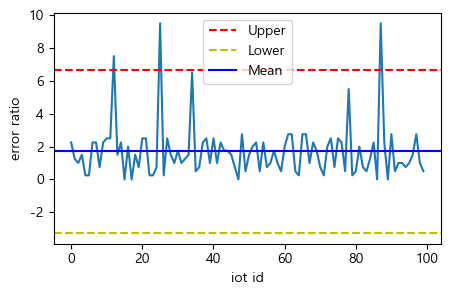

In [75]:
plt.figure(figsize=(5,3))
plt.plot(d['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--',label='Upper')
plt.axhline(y=lcl, color='y', linestyle='--',label='Lower')
plt.axhline(y=mean, color='b',label="Mean")
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()

## 6. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품의 패턴이 임의적인지 확인하라

### 6.1 연구가설과 귀무가설 작성
- 귀무가설: 두 상품의 패턴이 임의적이다.
- 대립가설: 두 상품의 패턴이 임의적이 아니다.

### 6.2 평균과 표준편차를 구하시오.

In [77]:
a = 14
b = 15

mean =2*a*b/(a+b) +1
std = (2*a*b*(2*a*b-a-b)/(a+b)**2/(a+b-1))**0.5
print('mean : ',mean,'std : ',std)

mean :  15.482758620689655 std :  2.6408030342821784


### 6.3 가설을 채택하시오.
- p-value > 0.05 이므로 귀무가설을 채택할 수 있다. 따라서 두 상품의 패턴은 임의적이라고 할 수 있다.

In [78]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# 귀무가설 : 랜덤생성
# 대립 : 랜덤생성이 아님
# 데이터 이진 변환, 각 패턴들을 구분지을 필요없이 하나로 연결
x = [1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0]
runstest_1samp(x, cutoff='mean', correction=True)

(-0.3721438547031917, 0.7097857460625617)